## Library 

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style('darkgrid')

In [3]:
# Name of the datasets that are present in seaborn library
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Let' Pick Iris dataset for our Classification

In [4]:
#iris Dataset
data = sns.load_dataset('iris')

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.shape

(150, 5)

In [7]:
#Count the species present in species column

data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

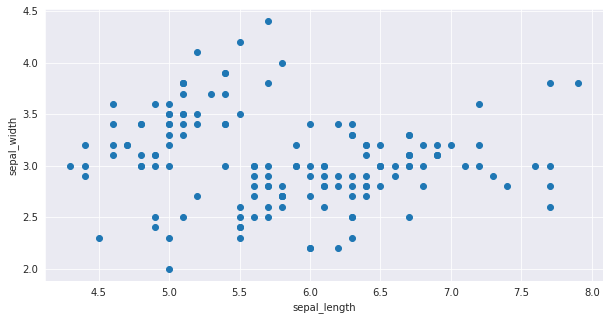

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(data['sepal_length'], data['sepal_width']);
plt.ylabel('sepal_width')
plt.xlabel('sepal_length');

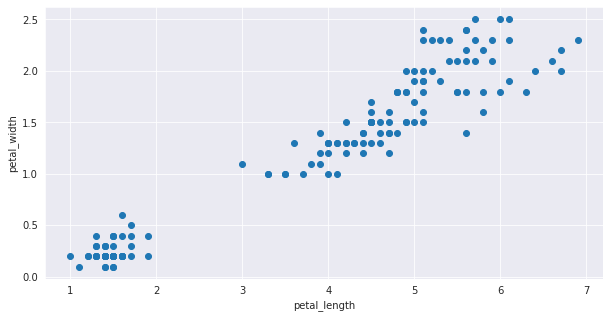

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(data['petal_length'], data['petal_width'], marker='o');
plt.ylabel('petal_width')
plt.xlabel('petal_length');

In [11]:
#Checking the null values

data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
#Converting the species into label encoding

def map_species(f):
  if f == 'setosa':
      f = 0
  elif f == 'versicolor':
      f = 1
  elif f == 'virginica':
      f = 2
  return f

In [16]:
data['species'] = data.species.map(map_species)

In [17]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

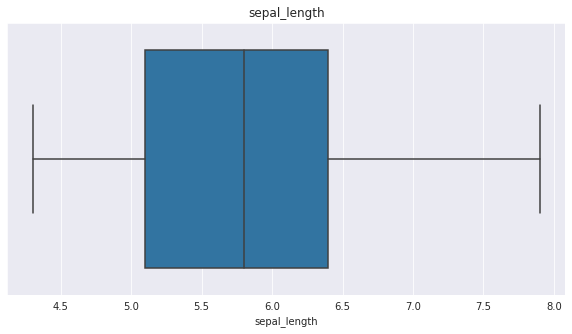

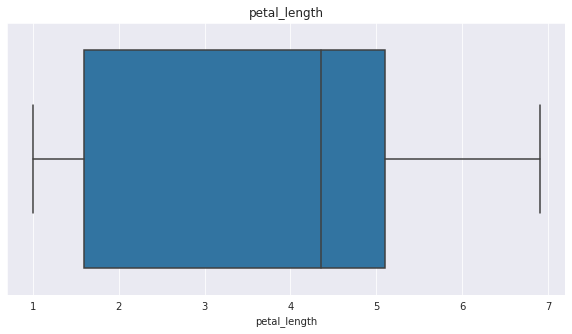

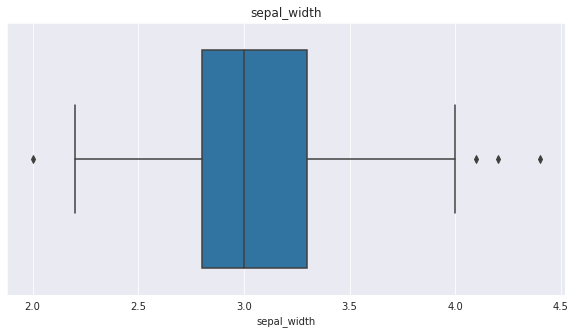

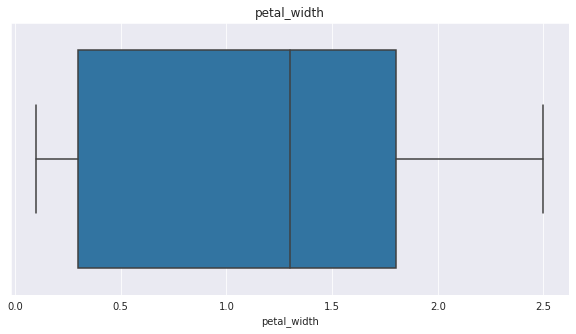

In [31]:
for f in ['sepal_length','petal_length','sepal_width','petal_width']:
  plt.figure(figsize=(10,5))
  sns.boxplot(data[f])
  plt.title(f)

In [32]:
## independent and dependent features

X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

#Standard Scaler

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.

#Unit Variance

Unit variance means dividing all the values by the standard deviation.

Standardization can be helpful in cases where the data follows Gaussian Distribution.

#fit_transform

we initially create an object of the standardscaler() function. Further we use fit_transform() along with the assigned object to transform the data and standardize it.

In [33]:
#preprocessing

sc = StandardScaler()
X = sc.fit_transform(X)

In [34]:
print(X)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

#Random_state in train_test_split

The random_state hyperparameter in the train_test_split() function controls the shuffling process. 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=50)

In [39]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [40]:
lg = LogisticRegression()

In [41]:
lg.fit(X_train,y_train)

LogisticRegression()

In [42]:
pred = lg.predict(X_test)

In [43]:
print("-------------Classification Report----------------")
print(classification_report(y_test, pred))

-------------Classification Report----------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



In [44]:
print("-------------Accuracy Score--------------")
print(accuracy_score(y_test,pred))

-------------Accuracy Score--------------
0.9736842105263158


--------------------Confusion Matrix-----------------


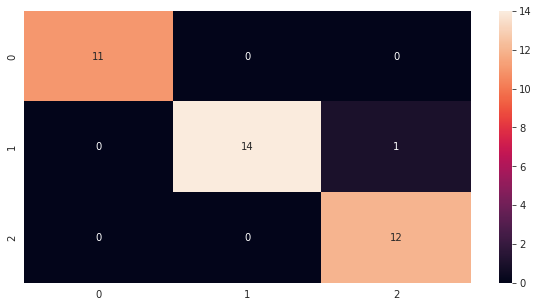

In [46]:
print("--------------------Confusion Matrix-----------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,pred), annot=True);

In [47]:
pd.DataFrame({'Actual':y_test, 'Predicted': pred}).head(50)

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,2,2
5,2,2
6,2,2
7,0,0
8,0,0
9,1,1
